In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numerik import gradient_descent

In [6]:
# define model functions for pump problem
def p_stat(fluid_density, gravity, height):
    return fluid_density * gravity * height

def p_res(drag_coefficient, pipe_length, pipe_area, flow_rate, fluid_density):
    fluid_velocity = flow_rate / pipe_area
    return pipe_length * drag_coefficient * fluid_density / 2 * fluid_velocity**2

def p_pump(flow_rate, power):
    p0 = 1000000
    a = 4/27 * (p0**3)/((power-10e5)**2)
    b = p0 / 2
    return p0 - a * flow_rate**2 - b * flow_rate**3

[]

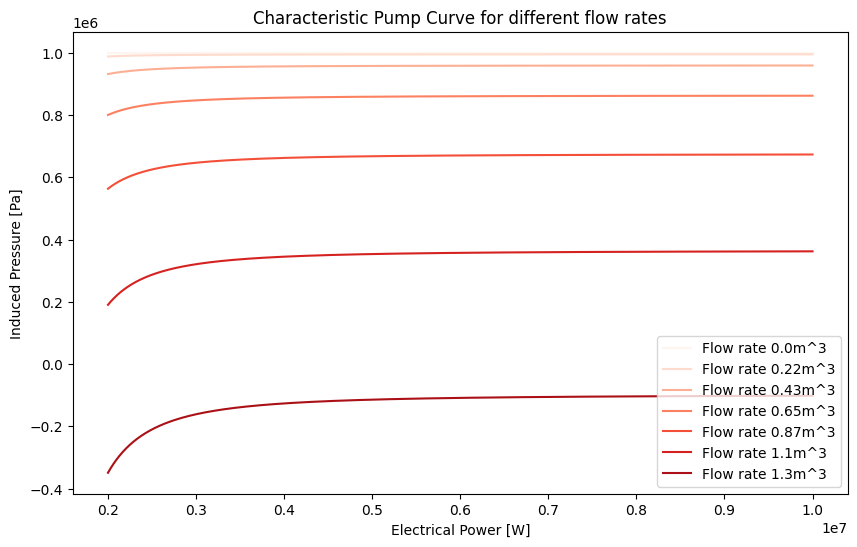

In [7]:
# plot pump induced pressure based on flow rate and power
plt.figure(figsize=(10,6))

powers = np.linspace(200, 1000, 1000) * 10e3
flow_rates = np.linspace(0, 1.3, 7)

red_cmap = matplotlib.colormaps["Reds"]

for i, fr in enumerate(flow_rates):
    pressures = p_pump(fr, powers)
    plt.plot(powers, pressures, label=f"Flow rate {fr:.2}m^3", color=red_cmap(i/len(flow_rates)))
    
plt.title("Characteristic Pump Curve for different flow rates")
plt.xlabel("Electrical Power [W]")
plt.ylabel("Induced Pressure [Pa]")
plt.legend(loc="lower right")

plt.plot()

As long as the induced pressure is positive we operate in the limits of the pump (at least theoretically).  As soon as we drop below a positive pressure we leave the operating range. This happens around a flow rate of 1.3m^3 regardless of the supplied power.

In [8]:
# calculate solution
fluid_density = 1000
height = 60
pipe_length = 500
pipe_area = 0.05
gravity = 9.81
drag_coefficient = 0.002
p0 = 10e6

def fitness_function(flow_rate, power):
    p_res1 = p_res(drag_coefficient, pipe_length, pipe_area, flow_rate, fluid_density)
    p_stat1 = p_stat(fluid_density, gravity, height)
    p_pump1 = p_pump(flow_rate, power)
    return p_pump1 - (p_res1 + p_stat1)

def fitness_function_jacobi(flow_rate, power):
    p_res1 = pipe_length * drag_coefficient * fluid_density * flow_rate / (pipe_area**2)
    p_pump1 = 4/27*p0**3/(power-10e5)**2*flow_rate*2-3*p0/2*flow_rate**2
    return -p_pump1 - p_res1


def get_flow_rate(power):
    x0 = 2
    
    f = lambda p: fitness_function(p, power)
    df = lambda p: fitness_function_jacobi(p, power)
    
    pf = gradient_descent.newton_single_parameter(f, df, x0) # does not work, yet
    return pf

print(get_flow_rate(600 * 10e3))

4412303.703703703
0 2 4412303.703703703
1 1.8756967863105176 3612670.7694144542
2 1.7544369965826918 2922571.8013440985
3 1.6359974205813184 2329121.5513635008
4 1.520139836501919 1820847.46497394
5 1.4066054409953321 1387544.2156094392
6 1.2951074012208659 1020144.0922495777
7 1.1853210362510227 710602.7409233964
8 1.0768719981409545 451801.7629993573
9 0.969328913001476 237477.71615769784
10 0.8622558708973658 62240.109187540365
11 0.7564137359069789 77181.56433955813
12 0.6437469808456698 192674.55132238287
13 0.5284379031624958 280113.6332217457
14 0.4058844008039192 344042.18710412655
15 0.268361225748654 386906.29317057715
16 0.09310460344674018 409211.40076920646
17 -0.3117838837561906 406536.236929727
18 -0.23476019784260999 406520.0313475969
19 -0.12497692744659686 409159.61694385274
20 0.10677756901169894 408443.4364907772
21 -0.25238792433814483 406321.10067058506
22 -0.15200507659688814 408398.04954003193
23 0.03288020081643095 411159.5983976745
24 -1.0305734121634922 73996